In [1]:
#Analysis correlation between GDP and hospital beds per 10e5 inhab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
def validate(s):
    try:
        return float(s)
    except ValueError:
        return 'y'

beds=pd.read_excel(r'C:\Users\marti\Dropbox\Openstax Coursera Python\Python\my_programs\Data_Eurostat\hosp_beds.xls'\
                  ,header=9,sheet_name='Data11',usecols=(0,9),na_values=':',skipfooter=3,encode='latin1')

#beds['2017'].apply(validate)
print (beds.dtypes)


gdp=pd.read_excel(r'C:\Users\marti\Dropbox\Openstax Coursera Python\Python\my_programs\Data_Eurostat\Eurostat_GDP.xls',\
                header=2,usecols=('A,AN'),na_values=':',skipfooter=8)
gdp.rename(columns={'geo/time':'GEO/TIME','2019':'GDP_capita'},inplace=True)

grad=pd.read_excel('Health_graduates.xls',header=3,usecols=('A,J'),na_values=":")


#print(grad['GEO/TIME'].str.find('Montenegro'))


df_final=gdp.reset_index(drop=True)
df_final['beds']=beds['2017'][0]
df_final['grad']=grad['2017'][0]
for i in range(0,len(df_final)):
    for a in range(0,len(beds)):
        if df_final['GEO/TIME'][i]==beds['GEO/TIME'][a]:
            df_final['beds'][i]=beds['2017'][a]
    for a in range(0,len(grad)):    
        if df_final['GEO/TIME'][i]==grad['GEO/TIME'][a]:
            df_final['grad'][i]=grad['2017'][a]
print (df_final.head())





GEO/TIME     object
2017        float64
dtype: object


C:\Users\marti\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marti\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                GEO/TIME  GDP_capita    beds   grad
0          EU (27 countries - from 2020)     27990.0  541.43  13.37
1                      EU (28 countries)     28630.0  541.43  13.37
2  Euro area - 19 countries  (from 2015)     31260.0  541.43  13.37
3                                Belgium     35900.0  566.35  14.80
4                               Bulgaria      6800.0  745.40  14.87


1.0859538024722806 0.8923818371677554
0.2921931574776941 0.8923818371677554
0.05852430095189988 0.8923818371677554


C:\Users\marti\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\marti\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

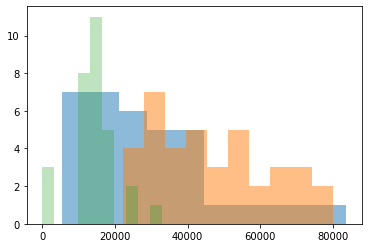

In [3]:
#Normal data?....#bell like histogram?
from scipy.stats import kurtosis, skew


print (skew(gdp['GDP_capita'],nan_policy='omit'),kurtosis(gdp['GDP_capita'],nan_policy='omit')    )
print (skew(beds['2017'],nan_policy='omit'),kurtosis(gdp['GDP_capita'],nan_policy='omit')    )
print (skew(grad['2017'],nan_policy='omit'),kurtosis(gdp['GDP_capita'],nan_policy='omit')    )

plt.hist(gdp['GDP_capita'],alpha=0.5)
plt.hist(beds['2017']*100,alpha=0.5)
plt.hist(grad['2017']*1000,alpha=0.3)
plt.plot()

Rho spearman (data not normally distributed) is -0.574 with p=0.0003


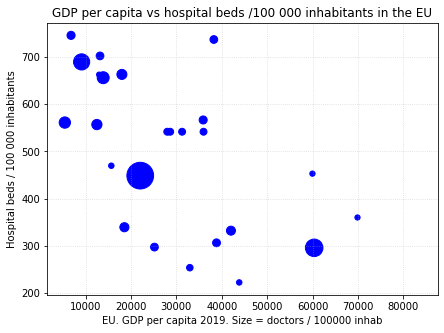

In [21]:
#Scatter plot and correlation
rho, pval= stats.spearmanr(df_final.GDP_capita,df_final.beds,nan_policy='omit')

print ('Rho spearman (data not normally distributed) is {:.3f} with p={:.4f}'.format(rho, pval))

title='GDP per capita vs hospital beds /100 000 inhabitants in the EU'
my_figure=plt.figure(title,figsize=(7,5))
ax=my_figure.add_subplot(1,1,1)
ax.scatter(df_final.GDP_capita,df_final.beds,c='blue',s=df_final.grad**3/50) #3/50 for scaling the size 
ax.set_ylabel('Hospital beds / 100 000 inhabitants')
ax.set_xlabel('EU. GDP per capita 2019. Size = doctors / 100000 inhab')
ax.grid(alpha=0.5,ls=':')
plt.title(title)
plt.show()



In [23]:
df_final.to_csv('df_gdp_beds_grad.csv')